In [7]:
# API = Application Program Interface
# API -> the user can access and use the data, the company doesn't take all the risk of opening up all their databases
# https://coinmarketcap.com/ -> click the Crypto API at the bottom
# API document

In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# use the URL on the API document
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '76da8c7e-48e2-425c-8ab7-f3c0d4d8cc3b',
# use your API key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  JSON_Response = json.loads(response.text)
  print(JSON_Response['data'])
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11603, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate'], 'max_supply': 21000000, 'circulating_supply': 19726731, 'total_supply': 19726731, 'infinite_supply': False, '

when it shows:
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

->>>>>> have to increase the data rate limit -> search Anaconda prompt -> (base) C:\Users\user>jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 -> copy and paste the url the prompt provided -> open the notebook from the URL, run again and it works!

In [12]:
# normalize it and make it better
# now is json

type(JSON_Response)

dict

In [14]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [16]:
# json normalize

df = pd.json_normalize(JSON_Response['data'])

# add timestamp
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11603,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972673e+07,1.972673e+07,False,NaN,1,NaN,NaN,None,2024-07-17T05:59:00.000Z,65697.327980,4.147203e+10,14.5322,-0.244519,3.304564,11.380139,-0.916110,-1.769340,7.407269,1.295994e+12,53.9066,1.379644e+12,None,2024-07-17T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
1,1027,Ethereum,ETH,ethereum,9140,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,None,2024-07-17T05:58:00.000Z,3506.587772,2.057350e+10,14.6502,0.363743,2.652487,13.030839,-1.740239,13.185212,17.370401,4.215663e+11,17.5277,4.215663e+11,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
2,825,Tether USDt,USDT,tether,91682,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-17T05:58:00.000Z,1.000518,7.461304e+10,11.1068,0.003542,-0.022387,0.033131,0.116399,0.013017,0.040408,1.132832e+11,4.7101,1.171328e+11,None,2024-07-17T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 14:00:22.673823
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475821e+08,1.475821e+08,False,NaN,4,NaN,NaN,None,2024-07-17T05:58:00.000Z,581.557106,2.033890e+09,2.1251,0.004760,2.227381,11.442949,-3.828551,0.138959,6.070852,8.582741e+10,3.5700,8.582741e+10,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
4,5426,Solana,SOL,solana,702,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.641764e+08,5.802879e+08,True,NaN,5,NaN,NaN,None,2024-07-17T05:58:00.000Z,161.703940,2.892701e+09,10.0205,0.306404,4.275694,12.233529,9.607624,-6.406642,21.034602,7.505915e+10,3.1209,9.383484e+10,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
5,3408,USDC,USDC,usd-coin,21012,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.400926e+10,3.400926e+10,False,NaN,6,NaN,NaN,None,2024-07-17T05:58:00.000Z,1.000008,7.610672e+09,3.2520,0.003732,0.026076,-0.000596,-0.002794,-0.002403,-0.005524,3.400954e+10,1.4140,3.400954e+10,None,2024-07-17T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 14:00:22.673823
6,52,XRP,XRP,xrp,1353,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-17T05:59:00.000Z,0.605477,3.277094e+09,42.9280,-0.659690,11.662732,38.096625,23.485086,15.671889,22.215892,3.378883e+10,1.4049,6.054766e+10,None,2024-07-17T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
7,11419,Toncoin,TON,toncoin,460,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512019e+09,5.109091e+09,True,NaN,8,3.414167e+09,2.498791e+10,None,2024-07-17T05:58:00.000Z,7.318890,2.716895e+08,-1.6225,0.124300,-1.724165,-0.915796,-7.610866,13.966429,20.840303,1.838519e+10,0.7644,3.739287e+10,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
8,74,Dogecoin,DOGE,dogecoin,1024,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1

In [52]:
# define api_runner and df2 (append)

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # use the URL on the API document
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '76da8c7e-48e2-425c-8ab7-f3c0d4d8cc3b',
    # use your API key
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      JSON_Response = json.loads(response.text)
      print(JSON_Response['data'])
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(JSON_Response['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    # another way:
    '''
    df2 = pd.json_normalize(JSON_Response['data'])
    df2['timestamp'] = pd.to_datetime('now')
    if 'df' in globals():
        global df
        df = pd.concat([df, df2], ignore_index=True)
    else:
        df = df2

    return df # Return the DataFrame
    '''


    # add to csv file
    # if there is no file (if not)
    # add one 
    # if there is a file (else)
    # add new data there
    if not os.path.isfile(r'C:\Users\user\Dropbox\PC\Documents\Python\API.csv'):
        df.to_csv(r'C:\Users\user\Dropbox\PC\Documents\Python\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\user\Dropbox\PC\Documents\Python\API.csv', mode = 'a', header = False)



In [50]:
# automate python scripts

# ability to track the time 
import os
from time import time
from time import sleep

# max of running 333 times (for free) (the limit from the website)
# sleep counts in seconds
for i in range(1000):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11604, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate'], 'max_supply': 21000000, 'circulating_supply': 19726753, 'total_supply': 19726753, 'infinite_supply': False, '

KeyboardInterrupt: 

In [56]:
df72 = pd.read_csv(r'C:\Users\user\Dropbox\PC\Documents\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11603,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.972673e+07,1.972673e+07,False,NaN,1,NaN,NaN,NaN,2024-07-17T05:59:00.000Z,65697.327980,4.147203e+10,14.5322,-0.244519,3.304564,11.380139,-0.916110,-1.769340,7.407269,1.295994e+12,53.9066,1.379644e+12,NaN,2024-07-17T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
1,1,1027,Ethereum,ETH,ethereum,9140,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,NaN,2024-07-17T05:58:00.000Z,3506.587772,2.057350e+10,14.6502,0.363743,2.652487,13.030839,-1.740239,13.185212,17.370401,4.215663e+11,17.5277,4.215663e+11,NaN,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
2,2,825,Tether USDt,USDT,tether,91682,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,NaN,2024-07-17T05:58:00.000Z,1.000518,7.461304e+10,11.1068,0.003542,-0.022387,0.033131,0.116399,0.013017,0.040408,1.132832e+11,4.7101,1.171328e+11,NaN,2024-07-17T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 14:00:22.673823
3,3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475821e+08,1.475821e+08,False,NaN,4,NaN,NaN,NaN,2024-07-17T05:58:00.000Z,581.557106,2.033890e+09,2.1251,0.004760,2.227381,11.442949,-3.828551,0.138959,6.070852,8.582741e+10,3.5700,8.582741e+10,NaN,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
4,4,5426,Solana,SOL,solana,702,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.641764e+08,5.802879e+08,True,NaN,5,NaN,NaN,NaN,2024-07-17T05:58:00.000Z,161.703940,2.892701e+09,10.0205,0.306404,4.275694,12.233529,9.607624,-6.406642,21.034602,7.505915e+10,3.1209,9.383484e+10,NaN,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,190,1958,TRON,TRX,tron,999,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.710975e+10,8.710978e+10,True,NaN,11,7.165966e+10,9.633334e+09,NaN,2024-07-17T06:19:00.000Z,0.134432,3.597575e+08,-10.6920,0.114427,0.042535,3.355672,14.930455,8.153356,22.633319,1.171032e+10,0.4863,1.171032e+10,NaN,2024-07-17T06:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:21:31.762392
386,191,5994,Shiba Inu,SHIB,shiba-inu,845,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892707e+14,5.895192e+14,False,NaN,12,NaN,NaN,NaN,2024-07-17T06:19:00.000Z,0.000020,5.621271e+08,-4.3740,-0.362091,2.468232,16.959945,-3.614665,-21.359000,-10.906598,1.150363e+10,0.4778,1.150848e+10,NaN,2024-07-17T06:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-07-17 14:21:31.762392
387,192,5805,Avalanche,AVAX,avalanche,751,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.946878e+08,4.440342e+08,False,NaN,13,NaN,NaN,NaN,2024-07-17T06:19:00.000Z,28.757948,4.671192e+08,22.0373,-0.398813,5.777865,6.049728,-1.635375,-22.823800,-15.470897,1.135041e+10,0.4714,2.058346e+1

In [62]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# '%.5f' % x: This is a format string that formats x to five decimal places.
# The %.5f part means to display the number as a floating point with five digits after the decimal point.


In [64]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11603,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726731.00000,19726731.00000,False,NaN,1,NaN,NaN,None,2024-07-17T05:59:00.000Z,65697.32798,41472032425.98277,14.53220,-0.24452,3.30456,11.38014,-0.91611,-1.76934,7.40727,1295993516486.80200,53.90660,1379643887586.98999,None,2024-07-17T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
1,1027,Ethereum,ETH,ethereum,9140,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221218.02997,120221218.02997,True,NaN,2,NaN,NaN,None,2024-07-17T05:58:00.000Z,3506.58777,20573495311.45584,14.65020,0.36374,2.65249,13.03084,-1.74024,13.18521,17.37040,421566253095.16467,17.52770,421566253095.15997,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
2,825,Tether USDt,USDT,tether,91682,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,113224555138.64410,117072162581.78760,True,NaN,3,NaN,NaN,None,2024-07-17T05:58:00.000Z,1.00052,74613035748.09172,11.10680,0.00354,-0.02239,0.03313,0.11640,0.01302,0.04041,113283234268.87106,4.71010,117132835751.72000,None,2024-07-17T05:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 14:00:22.673823
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582086.56829,147582086.56829,False,NaN,4,NaN,NaN,None,2024-07-17T05:58:00.000Z,581.55711,2033889893.58169,2.12510,0.00476,2.22738,11.44295,-3.82855,0.13896,6.07085,85827411109.11363,3.57000,85827411109.11000,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
4,5426,Solana,SOL,solana,702,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464176381.58138,580287896.05564,True,NaN,5,NaN,NaN,None,2024-07-17T05:58:00.000Z,161.70394,2892700795.56276,10.02050,0.30640,4.27569,12.23353,9.60762,-6.40664,21.03460,75059149575.85011,3.12090,93834838900.48000,None,2024-07-17T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:00:22.673823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1958,TRON,TRX,tron,999,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,87109754541.52359,87109783572.72325,True,NaN,11,71659659264.00000,9633334332.88928,None,2024-07-17T06:19:00.000Z,0.13443,359757494.98134,-10.69200,0.11443,0.04253,3.35567,14.93045,8.15336,22.63332,11710317880.00684,0.48630,11710321782.72000,None,2024-07-17T06:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 14:21:31.762392
191,5994,Shiba Inu,SHIB,shiba-inu,845,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270743113993.75000,589519212467867.37500,False,NaN,12,NaN,NaN,None,2024-07-17T06:19:00.000Z,0.00002,562127144.62592,-4.37400,-0.36209,2.46823,16.95994,-3.61466,-21.35900,-10.90660,11503629623.57598,0.47780,11508480194.31000,None,2024-07-17T06:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-07-17 14:21:31.762392
192,5805,Avalanche,AVAX,avalanche,751,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,394687811.28760,444034181.28760,False,NaN,13,NaN,NaN,None,2024-07-

In [68]:
# group them, see averages

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20407,3.13752,11.31067,-0.88978,-1.73898,7.38552
Ethereum,0.18832,2.42552,12.80312,-1.86926,13.06729,17.30681
Tether USDt,0.00846,0.01388,0.03481,0.11143,0.01707,0.03797
BNB,-0.01828,2.04700,11.26628,-3.85196,0.15362,6.20520
Solana,0.22899,3.93207,12.20187,9.55085,-6.36472,21.38896
USDC,-0.00082,0.00705,-0.00926,-0.00855,-0.00684,-0.01303
XRP,-0.56749,11.07164,37.84338,23.12119,15.45461,22.11469
Toncoin,0.00731,-1.79556,-0.92898,-7.53131,13.81187,21.07325
Dogecoin,-0.22459,2.58553,15.00225,-6.42888,-18.58939,-14.58967


In [80]:
# change the coin names to rows

df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.20407
           quote.USD.percent_change_24h     3.13752
           quote.USD.percent_change_7d     11.31067
           quote.USD.percent_change_30d    -0.88978
           quote.USD.percent_change_60d    -1.73898
                                             ...   
Chainlink  quote.USD.percent_change_24h     0.90801
           quote.USD.percent_change_7d      9.83074
           quote.USD.percent_change_30d    -3.07577
           quote.USD.percent_change_60d   -12.00516
           quote.USD.percent_change_90d     8.25344
Length: 90, dtype: float64

In [82]:
type(df3)

pandas.core.frame.DataFrame

In [84]:
# no longer a dataframe but a series
type(df4)

pandas.core.series.Series

In [90]:
# change df4 to dataframe
df5 = df4.to_frame(name = 'values')
df5

# the coin names now act like index

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.20407
          quote.USD.percent_change_24h   3.13752
          quote.USD.percent_change_7d   11.31067
          quote.USD.percent_change_30d  -0.88978
          quote.USD.percent_change_60d  -1.73898
...                                          ...
Chainlink quote.USD.percent_change_24h   0.90801
          quote.USD.percent_change_7d    9.83074
          quote.USD.percent_change_30d  -3.07577
          quote.USD.percent_change_60d -12.00516
          quote.USD.percent_change_90d   8.25344

[90 rows x 1 columns]

In [92]:
type(df5)

pandas.core.frame.DataFrame

In [94]:
df5.count()

values    90
dtype: int64

In [98]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20407
1,Bitcoin,quote.USD.percent_change_24h,3.13752
2,Bitcoin,quote.USD.percent_change_7d,11.31067
3,Bitcoin,quote.USD.percent_change_30d,-0.88978
4,Bitcoin,quote.USD.percent_change_60d,-1.73898
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.90801
86,Chainlink,quote.USD.percent_change_7d,9.83074
87,Chainlink,quote.USD.percent_change_30d,-3.07577
88,Chainlink,quote.USD.percent_change_60d,-12.00516


In [106]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20407
1,Bitcoin,quote.USD.percent_change_24h,3.13752
2,Bitcoin,quote.USD.percent_change_7d,11.31067
3,Bitcoin,quote.USD.percent_change_30d,-0.88978
4,Bitcoin,quote.USD.percent_change_60d,-1.73898
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.90801
86,Chainlink,quote.USD.percent_change_7d,9.83074
87,Chainlink,quote.USD.percent_change_30d,-3.07577
88,Chainlink,quote.USD.percent_change_60d,-12.00516


In [126]:
# change the column names to shorter ones for better visualization
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20407
1,Bitcoin,24h,3.13752
2,Bitcoin,7d,11.31067
3,Bitcoin,30d,-0.88978
4,Bitcoin,60d,-1.73898
...,...,...,...
85,Chainlink,24h,0.90801
86,Chainlink,7d,9.83074
87,Chainlink,30d,-3.07577
88,Chainlink,60d,-12.00516


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

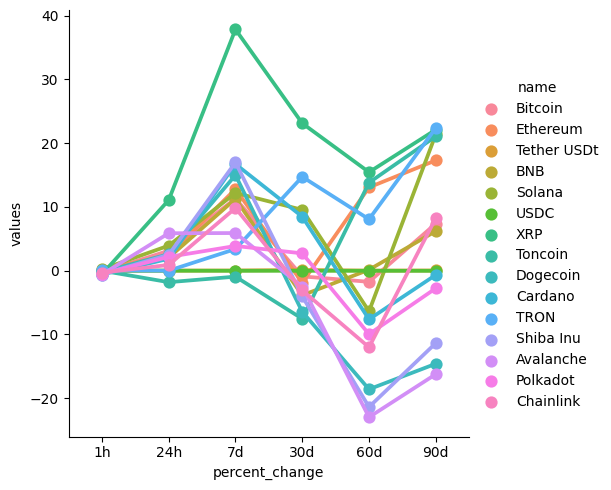

In [130]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [146]:
# extract data

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,65697.32798,2024-07-17 14:00:22.673823
15,Bitcoin,65697.32798,2024-07-17 14:00:31.216475
30,Bitcoin,65686.69286,2024-07-17 14:01:33.181879
45,Bitcoin,65694.81138,2024-07-17 14:02:34.886990
60,Bitcoin,65683.49633,2024-07-17 14:03:58.496712
75,Bitcoin,65683.49633,2024-07-17 14:04:05.104177
90,Bitcoin,65683.49633,2024-07-17 14:04:11.973255
105,Bitcoin,65683.49633,2024-07-17 14:04:18.678605
120,Bitcoin,65718.10111,2024-07-17 14:05:43.773016
135,Bitcoin,65752.94507,2024-07-17 14:06:45.759484


#when encounter:

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [166]:
import numpy as np

# Replace inf values with NaN
df10.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

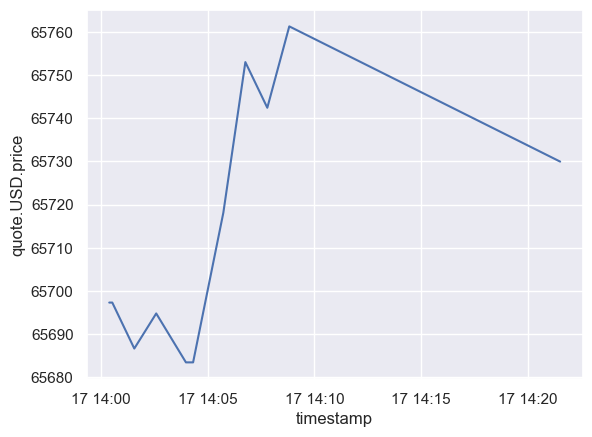

In [168]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)